In [1]:
# analyzing how heights range based on coffee drinking habbits and age

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display as disp

np.random.seed(42) # same seed as another rto be able to make comparisons from psuedorandom samples 

coffee_full = pd.read_csv('coffee_dataset.csv')  
coffee_red = coffee_full.sample(150) # red for reduced  # command for getting a random sample from ma dataframe

disp(coffee_full.head(3))

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854


(67.10804415057915, 68.16154315987828)

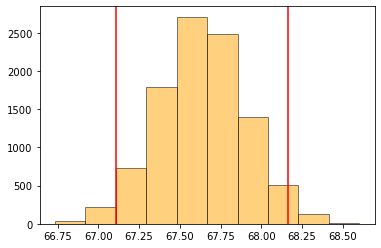

In [5]:
means = []

for i in range(10000):
    bootsample = coffee_red.sample(150, replace =True)
    means.append(bootsample['height'].mean())
    
confidence_interval_mean = np.percentile(means, 2.5),np.percentile(means, 97.5)
disp(confidence_interval_mean)

# lets plot mean sampling distribution 
plt.hist(means, edgecolor='black', linewidth=1, color = 'orange', alpha = 0.5)

plt.axvline(x = confidence_interval_mean[0], color = 'red')
plt.axvline(x = confidence_interval_mean[1], color = 'red')

0.2658039514418037

67.63297688228066

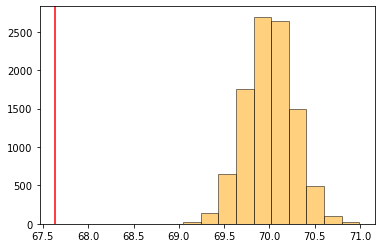

In [4]:
# Here we assume that our null hypothesis is true and we take the value from hull hypothesis
# that is closest to the alternative (70 in our case)

# then we see the standard deviation of the sampling distribution means
# std_70 = means.std() throws error as list has no method std
std_70 = np.std(means)
disp(std_70)

# Then we create a normal distribution with mean = 70 and std_70
null_dist = np.random.normal(70, std_70, 10000)
plt.hist(null_dist, edgecolor='black', linewidth=1, color = 'orange', alpha = 0.5)

# Then we check the actual statistic mean and see where it falls in our null_dist
disp(coffee_red['height'].mean())
plt.axvline(x = coffee_red['height'].mean(), color = 'red')

In [ ]:
##########################################################################################################################
##########################################################################################################################

<div style="background-color:rgba(255, 0, 0, 0.2)">

# Common hypothesis tests include:

### - Testing a population mean (One sample t-test).

### - Testing the difference in means (Two sample t-test)

### - Testing the difference before and after some treatment on the same individual (Paired t-test)

### - Testing a population proportion (One sample z-test)

### - Testing the difference between population proportions (Two sample z-test)
    
</div>




<div style="background-color:rgba(0, 255, 0, 0.2)">

# One sample T-Test (to test the mean)
    
</div>


In [6]:
# A One sample T-test for mean height

In [82]:
from statsmodels.stats.weightstats import DescrStatsW 

# One_sample_ttest ---> DescrStatsW.ttest_mean

from scipy.stats import ttest_1samp as One_sample_ttest

# scipy always gives the test statistic as signed. This means that given p and t values from a two-tailed test, 
# you would reject the null hypothesis of a greater-than test when p/2 < alpha and t > 0, and of a less-than test 
# when p/2 < alpha and t < 0.

coffee_full['height'].mean()

67.59748697307937

$$H_0: h_{mean} = 70$$
$$H_1: h_{mean} \neq 70$$

In [37]:
# With statmodels

# first we need to create a DescrStatsW object for oy data
DescrStatsW_obj = DescrStatsW(coffee_full['height'])
t_stat, p_stat, degF = DescrStatsW_obj.ttest_mean(value = 70,  alternative='two-sided')
disp(t_stat, p_stat)

# WE REJECT THE NULL

# With scipy
t_stat, p_stat = One_sample_ttest(coffee_full['height'], 70)
disp(t_stat, p_stat)

# scipy always gives the test statistic as signed. This means that given p and t values from a two-tailed test, 
# you would reject the null hypothesis of a greater-than test when p/2 < alpha and t > 0, and of a less-than test 
# when p/2 < alpha and t < 0.

# WE REJECT THE NULL

-42.00108817355559

4.3206547622747683e-303

-42.00108817355559

4.3206547622747683e-303

$$H_0: h_{mean} \leq 70$$
$$H_1: h_{mean} > 70$$

In [53]:
# With statmodels

# first we need to create a DescrStatsW object for oy data
DescrStatsW_obj = DescrStatsW(coffee_full['height'])
t_stat, p_stat, degF = DescrStatsW_obj.ttest_mean(value = 70,  alternative='larger')
disp(t_stat, p_stat)

# WE FAIL TO REJECT THE NULL

# With scipy does not accept alternative keyword for some unknown reason
t_stat, p_stat = One_sample_ttest(coffee_full['height'], 70)
disp(t_stat, p_stat)

# scipy always gives the test statistic as signed. This means that given p and t values from a two-tailed test, 
# you would reject the null hypothesis of a greater-than test when p/2 < alpha and t > 0, and of a less-than test 
# when p/2 < alpha and t < 0.

# WE FAIL TO REJECT THE NULL

-42.00108817355559

1.0

-42.00108817355559

4.3206547622747683e-303

$$H_0: h_{mean} \geq 70$$
$$H_1: h_{mean} < 70$$

In [54]:
# With statmodels

# first we need to create a DescrStatsW object for oy data
DescrStatsW_obj = DescrStatsW(coffee_full['height'])
t_stat, p_stat, degF = DescrStatsW_obj.ttest_mean(value = 70,  alternative='smaller')
disp(t_stat, p_stat)

# WE REJECT THE NULL

# With scipy does not accept alternative keyword for some unknown reason
t_stat, p_stat = One_sample_ttest(coffee_full['height'], 70)
disp(t_stat, p_stat/2)

# scipy always gives the test statistic as signed. This means that given p and t values from a two-tailed test, 
# you would reject the null hypothesis of a greater-than test when p/2 < alpha and t > 0, and of a less-than test 
# when p/2 < alpha and t < 0.

# WE REJECT THE NULL

-42.00108817355559

2.1603273811373842e-303

-42.00108817355559

2.1603273811373842e-303

<div style="background-color:rgba(0, 255, 0, 0.2)">

# Two sample T-Test (to compare means / test difference of means fro independent data)
    
</div>




### Difference between Z-test and t-test: Z-test is used when sample size is large (n>50), or the population variance is known. t-test is used when sample size is small (n<50) and population variance is unknown.

Both essestially do the same thing.

In [ ]:
# A Two sample T-test for difference in means of heights between coffee drinkers and no coffee drinkers

In [84]:
from statsmodels.stats.weightstats import CompareMeans 

# Two_sample_ttest ---> CompareMeans.ttest_ind

from scipy.stats import ttest_ind as Two_sample_ttest

coffee_full[coffee_full['drinks_coffee']==True]['height'].mean() - coffee_full[coffee_full['drinks_coffee']==False]['height'].mean()

1.9568024933369657

$$H_0: h_{c,mean} - h_{nc,mean} = 0$$
$$H_1: h_{c,mean} - h_{nc,mean} \neq 0$$

In [67]:
# With statmodels

# first we need to create a DescrStatsW object for oy data
coff_h = coffee_full[coffee_full['drinks_coffee']==True]['height']
nocoff_h = coffee_full[coffee_full['drinks_coffee']==False]['height']
DescrStatsW_obj_coff = DescrStatsW(coff_h)
DescrStatsW_obj_no_coff = DescrStatsW(nocoff_h)

cm_obj = CompareMeans(DescrStatsW_obj_coff, DescrStatsW_obj_no_coff)

t_stat, p_stat, degF = cm_obj.ttest_ind(value = 0,  alternative='two-sided')
disp(t_stat, p_stat)

# ttest vs ztest?
t_stat, p_stat = cm_obj.ztest_ind(value = 0,  alternative='two-sided')
disp(t_stat, p_stat)

# WE REJECT THE NULL

# With scipy
t_stat, p_stat = Two_sample_ttest(coff_h,nocoff_h)
disp(t_stat, p_stat)

# scipy always gives the test statistic as signed. This means that given p and t values from a two-tailed test, 
# you would reject the null hypothesis of a greater-than test when p/2 < alpha and t > 0, and of a less-than test 
# when p/2 < alpha and t < 0.

# WE REJECT THE NULL

17.687015602592847

1.2214047126683823e-66

17.687015602592847

5.279875078897718e-70

17.687015602592975

1.2214047126657702e-66

$$H_0: h_{c,mean} - h_{nc,mean} \leq 0$$
$$H_1: h_{c,mean} - h_{nc,mean} > 0$$

In [68]:
# With statmodels

# first we need to create a DescrStatsW object for oy data
coff_h = coffee_full[coffee_full['drinks_coffee']==True]['height']
nocoff_h = coffee_full[coffee_full['drinks_coffee']==False]['height']
DescrStatsW_obj_coff = DescrStatsW(coff_h)
DescrStatsW_obj_no_coff = DescrStatsW(nocoff_h)

cm_obj = CompareMeans(DescrStatsW_obj_coff, DescrStatsW_obj_no_coff)

t_stat, p_stat, degF = cm_obj.ttest_ind(value = 0,  alternative='larger')
disp(t_stat, p_stat)

# ttest vs ztest?
t_stat, p_stat = cm_obj.ztest_ind(value = 0,  alternative='larger')
disp(t_stat, p_stat)

# WE REJECT THE NULL

# With scipy
t_stat, p_stat = Two_sample_ttest(coff_h,nocoff_h)
disp(t_stat, p_stat)

# scipy always gives the test statistic as signed. This means that given p and t values from a two-tailed test, 
# you would reject the null hypothesis of a greater-than test when p/2 < alpha and t > 0, and of a less-than test 
# when p/2 < alpha and t < 0.

# WE REJECT THE NULL

17.687015602592847

6.107023563341912e-67

17.687015602592847

2.639937539448859e-70

17.687015602592975

1.2214047126657702e-66

$$H_0: h_{c,mean} - h_{nc,mean} \geq 0$$
$$H_1: h_{c,mean} - h_{nc,mean} < 0$$

In [69]:
# With statmodels

# first we need to create a DescrStatsW object for oy data
coff_h = coffee_full[coffee_full['drinks_coffee']==True]['height']
nocoff_h = coffee_full[coffee_full['drinks_coffee']==False]['height']
DescrStatsW_obj_coff = DescrStatsW(coff_h)
DescrStatsW_obj_no_coff = DescrStatsW(nocoff_h)

cm_obj = CompareMeans(DescrStatsW_obj_coff, DescrStatsW_obj_no_coff)

t_stat, p_stat, degF = cm_obj.ttest_ind(value = 0,  alternative='smaller')
disp(t_stat, p_stat)

# ttest vs ztest?
t_stat, p_stat = cm_obj.ztest_ind(value = 0,  alternative='smaller')
disp(t_stat, p_stat)

# WE FAIL TO REJECT THE NULL

# With scipy
t_stat, p_stat = Two_sample_ttest(coff_h,nocoff_h)
disp(t_stat, p_stat)

# scipy always gives the test statistic as signed. This means that given p and t values from a two-tailed test, 
# you would reject the null hypothesis of a greater-than test when p/2 < alpha and t > 0, and of a less-than test 
# when p/2 < alpha and t < 0.

# WE FAIL TO REJECT THE NULL

17.687015602592847

1.0

17.687015602592847

1.0

17.687015602592975

1.2214047126657702e-66

<div style="background-color:rgba(0, 255, 0, 0.2)">

# paired sample T-Test (to compare means / test difference of means of data that are NOT INDEPENDENT)
    
</div>




In [61]:
# a paired sample t_test of heigts and (10 + heights)

coffee_full['height_plus_10'] = coffee_full['height'] + 10
coffee_full.head()

,user_id,age,drinks_coffee,height,height_plus_10
0,4509,<21,False,64.538179,74.538179
1,1864,>=21,True,65.824249,75.824249
2,2060,<21,False,71.319854,81.319854
3,7875,>=21,True,68.569404,78.569404
4,6254,<21,True,64.020226,74.020226


In [58]:
from statsmodels.stats.weightstats import ttost_paired

from scipy.stats import ttest_rel as Paired_sample_ttest

$$H_0: (md < low)  .or.  (md > upp)$$
$$H_1: low < md < upp$$

In [65]:
# md is the mean expected value of the difference between the paired samples (mean(x1 - x2))
# for our simple case it doesnt need to be computed as we know it is 10

pval, lower_values_tuple, upper_values_tuple = ttost_paired(coffee_full['height_plus_10'], coffee_full['height'], low = 8, upp = 12)
disp(pval)
disp(lower_values_tuple)
disp(upper_values_tuple)

# low = 8; upp = 12
# WE REJECT THE NULL (which was expected as we set our md = 10)

pval, lower_values_tuple, upper_values_tuple = ttost_paired(coffee_full['height_plus_10'], coffee_full['height'], low = 5, upp = 8)
disp(pval)
disp(lower_values_tuple)
disp(upper_values_tuple)

# low = 5; upp = 8
# WE FAIL TO REJECT THE NULL (which was expected as we set our md = 10)


0.0

(5.859932923722277e+16, 0.0, 2973.0)

(-5.859932923722277e+16, 0.0, 2973.0)

1.0

(1.4649832309305693e+17, 0.0, 2973.0)

(5.859932923722277e+16, 1.0, 2973.0)

$$H_0: md = 0$$
$$H_1: md \neq 0$$

In [80]:
# using scipy

# THIS IS DIFFERENT THAN ttost_paired. This is a simple two sided test (if the means differ?)

stat, pval = Paired_sample_ttest(coffee_full['height_plus_10'], coffee_full['height'])
disp(stat)
disp(pval)

# WE REJECT THE NULL (results are expected as md = 10)

stat, pval = Paired_sample_ttest(coffee_full['height'], coffee_full['height'])
disp(stat)
disp(pval)

# returns nan as there is no difference
coffee_full['similar_heights'] = np.random.normal(coffee_full['height'].mean()*1.00001, coffee_full['height'].std(), coffee_full.shape[0])
stat, pval = Paired_sample_ttest(coffee_full['similar_heights'], coffee_full['height'])
disp(stat)
disp(pval)

2.9299664618611386e+17

0.0

nan

nan

0.9166392032476258

0.35940608187468537

<div style="background-color:rgba(0, 255, 0, 0.2)">

# One sample Z-Test (to test the propotion)
    
</div>




In [22]:
# A One sample z-test for propotion of coffee drinkers

In [81]:
from statsmodels.stats.proportion import proportions_ztest

# applys to both one and two samples

(coffee_full['drinks_coffee']==1).mean()

0.589778076664425

$$H_0: p_{coff} = 0.5$$
$$H_1: p_{coff} \neq 0.5$$

In [86]:
counts =(coffee_full['drinks_coffee']==1).sum()
nobs = coffee_full.shape[0]
z_score, pval = proportions_ztest(counts, nobs, value = 0.5, alternative = 'two-sided')
disp(z_score)
disp(pval)

# WE REJECT THE NULL

9.95375698744604

2.4283847917850152e-23

$$H_0: p_{coff} \leq 0.5$$
$$H_1: p_{coff} > 0.5$$

In [87]:
counts =(coffee_full['drinks_coffee']==1).sum()
nobs = coffee_full.shape[0]
z_score, pval = proportions_ztest(counts, nobs, value = 0.5, alternative = 'larger')
disp(z_score)
disp(pval)

# WE REJECT THE NULL

9.95375698744604

1.2141923958925076e-23

$$H_0: p_{coff} \geq 0.5$$
$$H_1: p_{coff} < 0.5$$

In [88]:
counts =(coffee_full['drinks_coffee']==1).sum()
nobs = coffee_full.shape[0]
z_score, pval = proportions_ztest(counts, nobs, value = 0.5, alternative = 'smaller')
disp(z_score)
disp(pval)

# WE FAIL TO REJECT THE NULL

9.95375698744604

1.0

<div style="background-color:rgba(0, 255, 0, 0.2)">

# Two sample Z-Test (to compare propotions / test difference of propotions)
    
</div>





In [94]:
from statsmodels.stats.proportion import proportions_ztest

# applys to both one and two samples
old_21 = coffee_full[coffee_full['age']=='>=21']
young_21 = coffee_full[coffee_full['age']=='<21']
(old_21['drinks_coffee']==True).mean() - (young_21['drinks_coffee']==True).mean()

0.1962406015037594

$$H_0: p_{c,adult} - p_{c,notadult} = 0$$
$$H_1: p_{c,adult} - p_{c,notadult} \neq 0$$

In [104]:
counts = np.array([(old_21['drinks_coffee']==True).sum(), (young_21['drinks_coffee']==True).sum()])
nobs = np.array([old_21.shape[0], young_21.shape[0]])
z_score, pval = proportions_ztest(counts, nobs, value = 0, alternative = 'two-sided')
disp(z_score)
disp(pval)

# WE REJECT THE NULL

39.24440466729966

0.0

$$H_0: p_{c,adult} - p_{c,notadult} \leq 0$$
$$H_1: p_{c,adult} - p_{c,notadult} > 0$$

In [105]:
counts = np.array([(old_21['drinks_coffee']==True).sum(), (young_21['drinks_coffee']==True).sum()])
nobs = np.array([old_21.shape[0], young_21.shape[0]])
z_score, pval = proportions_ztest(counts, nobs, value = 0, alternative = 'larger')
disp(z_score)
disp(pval)

# WE REJECT THE NULL

39.24440466729966

0.0

$$H_0: p_{c,adult} - p_{c,notadult} \geq 0$$
$$H_1: p_{c,adult} - p_{c,notadult} < 0$$

In [107]:
counts = np.array([(old_21['drinks_coffee']==True).sum(), (young_21['drinks_coffee']==True).sum()])
nobs = np.array([old_21.shape[0], young_21.shape[0]])
z_score, pval = proportions_ztest(counts, nobs, value = 0, alternative = 'smaller')
disp(z_score)
disp(pval)

# WE FAIL TO REJECT THE NULL

39.24440466729966

1.0

<div style="background-color:rgba(255, 0, 0, 0.2)">

# What if samples are not normally distributed? (which is the assumption for t-test)
    
</div>







<div style="background-color:rgba(0, 255, 0, 0.2)">

# We do a signed test instead
https://www.statsmodels.org/stable/generated/statsmodels.stats.descriptivestats.sign_test.html
    
</div>

<div style="background-color:rgba(0, 255, 0, 0.2)">

# First we check if our data is normally distributed or not (other than a histogram), to decide which test to use?
# We can do that using the scipy.stats.shapiro test (other tests are available too)
https://pythonfordatascienceorg.wordpress.com/paired-samples-t-test-python/
    
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
</div>

